In [37]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" 
# Добавляем наименования для нашего датаcета
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] 
# Считываем датасет
iris = datasets.load_iris()
dataset = pd.read_csv(url, names=names)

In [38]:
#Отображение основных данных нашего датасета
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#Создание тренировочных и тестовых разрезов
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [40]:
#Масштабирование функций
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [41]:
#Обучение и тренировка алгоритма KNN
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

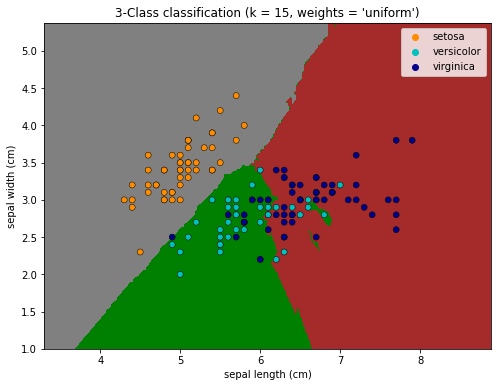

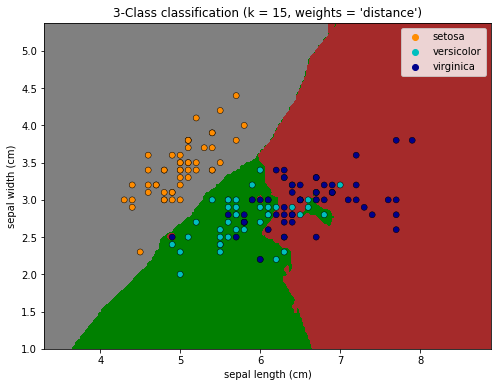

In [54]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

X = iris.data[:, :2]
y = iris.target
h = .02  # размер шага ячейки
n_neighbors = 15

# Создание графика
cmap_light = ListedColormap(['grey', 'green', 'brown'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # Создание кластеров методом ближайших соседей
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Распределение границ кластеров и определение шагов [x_min, x_max]x[y_min, y_max] для графика.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Отображение результатов в виде графика
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Отображаем так же "обучающие" точки
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()


In [55]:
#Оценка точности алгоритма
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

